In [71]:
import pandas as pd
import lightgbm as lgb
from sklearn.metrics import classification_report as cr, confusion_matrix as cm, roc_auc_score 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [72]:
df_original = pd.read_csv("../Base.csv")
df_original.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,13096.035018,7850.955007,6742.080561,5,5,CB,163,1,BC,0,1,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,9223.283431,5745.251481,5941.664859,3,18,CA,154,1,BC,1,1,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,4471.472149,5471.988958,5992.555113,15,11,CA,89,1,BC,0,1,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,14431.993621,6755.344479,5970.336831,11,13,CA,90,1,BC,0,1,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,7601.511579,5124.046930,5940.734212,1,6,CA,91,0,BC,1,1,26,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [73]:
df_resampled = pd.read_csv("df_resampled.csv")
df_resampled.tail()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,fraud_bool
117635,0.167342,0.128287,-1,140,36,0.013914,-1.188628,2,902,457.323809,2154.469318,3812.653100,10,10,0,223,1,0,0,1,12,0,1500.000000,0,0,7.304120,2,0,1,0,6,1
117636,0.235304,0.217058,-1,114,57,0.015453,-1.126396,1,1017,6748.501279,3563.384378,5040.898605,1838,5,0,104,1,0,0,1,9,0,200.000000,0,0,5.846984,3,0,1,0,3,1
117637,0.844097,0.828784,115,12,20,0.013102,-1.097848,1,719,765.831924,3839.845572,3125.877011,17,11,0,64,0,1,0,1,28,0,200.000000,0,0,7.341642,3,0,1,0,6,1
117638,0.490177,0.134184,-1,50,28,0.015163,-1.656712,2,1904,5442.114657,5448.523675,4176.628506,3,3,0,135,1,0,0,1,26,0,200.000000,0,0,4.556018,2,0,1,0,5,1
117639,0.672238,0.488240,-1,72,22,0.012055,-1.174175,1,654,8285.322091,5383.642460,3280.623920,9,6,0,91,0,0,0,1,25,0,283.286916,0,0,3.951850,3,0,1,0,6,1


In [74]:
X_test = df_original.drop("fraud_bool", axis=1)
y_test = df_original["fraud_bool"]
print(X_test.head())
print(y_test.head())


   income  name_email_similarity  ...  device_fraud_count  month
0     0.3               0.986506  ...                   0      0
1     0.8               0.617426  ...                   0      0
2     0.8               0.996707  ...                   0      0
3     0.6               0.475100  ...                   0      0
4     0.9               0.842307  ...                   0      0

[5 rows x 31 columns]
0    0
1    0
2    0
3    0
4    0
Name: fraud_bool, dtype: int64


In [75]:
X_train = df_resampled.drop(columns=["fraud_bool"])
y_train = df_resampled["fraud_bool"]
print(X_train.head())
print(y_train.head())

   income  name_email_similarity  ...  device_fraud_count  month
0     0.1               0.019742  ...                   0      3
1     0.9               0.185549  ...                   0      7
2     0.2               0.802497  ...                   0      5
3     0.4               0.268557  ...                   0      3
4     0.9               0.523754  ...                   0      2

[5 rows x 31 columns]
0    0
1    0
2    0
3    0
4    0
Name: fraud_bool, dtype: int64


In [76]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)


In [77]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 58820, number of negative: 58820
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3767
[LightGBM] [Info] Number of data points in the train set: 117640, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(colsample_bytree=0.9, learning_rate=0.05, n_estimators=500,
               random_state=42, subsample=0.9)

In [78]:
# Make a copy of test sets
X_test_encoded = X_test.copy()

# Find all object columns
object_cols = X_test_encoded.select_dtypes(include=['object']).columns.tolist()

# Convert all object columns to category codes
for col in object_cols:
    X_test_encoded[col] = X_test_encoded[col].astype('category').cat.codes
    


In [79]:
y_pred = lgb_model.predict(X_test_encoded)
y_prob = lgb_model.predict_proba(X_test_encoded)[:, 1]


=== LIGHTGBM CLASSIFICATION REPORT (Threshold = 0.1) ===
              precision    recall  f1-score   support

           0       1.00      0.77      0.87    988971
           1       0.04      0.92      0.08     11029

    accuracy                           0.77   1000000
   macro avg       0.52      0.85      0.48   1000000
weighted avg       0.99      0.77      0.86   1000000



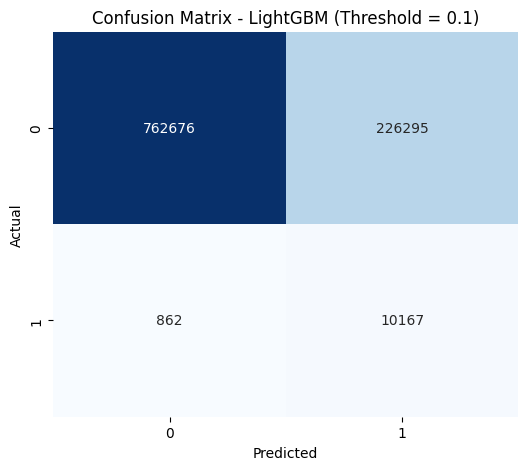


=== ROC-AUC SCORE (Threshold = 0.1) ===
0.9267350906098295

=== LIGHTGBM CLASSIFICATION REPORT (Threshold = 0.2) ===
              precision    recall  f1-score   support

           0       1.00      0.87      0.93    988971
           1       0.07      0.83      0.13     11029

    accuracy                           0.87   1000000
   macro avg       0.53      0.85      0.53   1000000
weighted avg       0.99      0.87      0.92   1000000



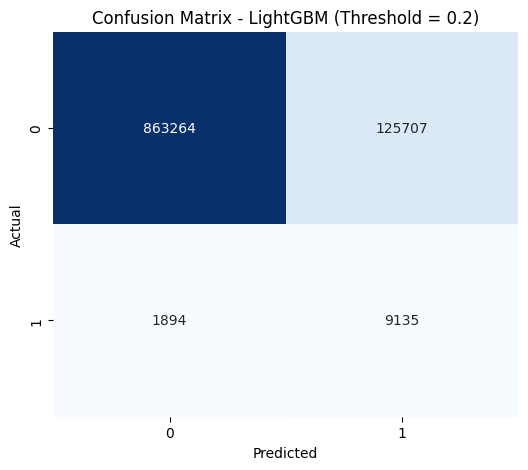


=== ROC-AUC SCORE (Threshold = 0.2) ===
0.9267350906098295

=== LIGHTGBM CLASSIFICATION REPORT (Threshold = 0.3) ===
              precision    recall  f1-score   support

           0       1.00      0.92      0.95    988971
           1       0.09      0.73      0.16     11029

    accuracy                           0.91   1000000
   macro avg       0.54      0.82      0.56   1000000
weighted avg       0.99      0.91      0.95   1000000



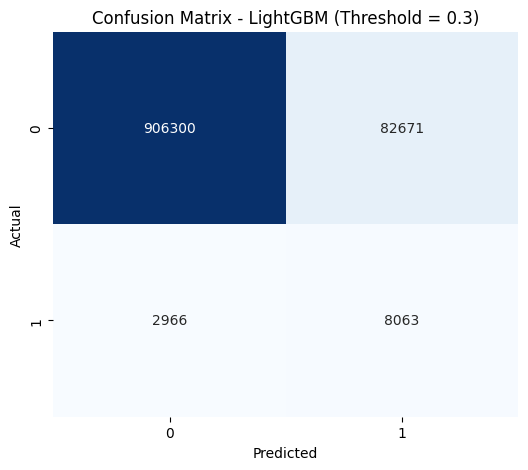


=== ROC-AUC SCORE (Threshold = 0.3) ===
0.9267350906098295

=== LIGHTGBM CLASSIFICATION REPORT (Threshold = 0.4) ===
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    988971
           1       0.11      0.65      0.19     11029

    accuracy                           0.94   1000000
   macro avg       0.55      0.79      0.58   1000000
weighted avg       0.99      0.94      0.96   1000000



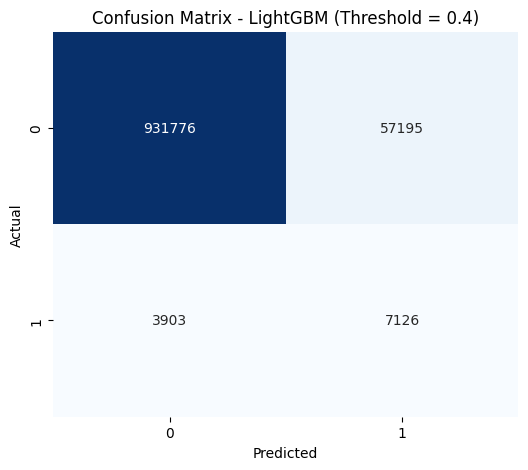


=== ROC-AUC SCORE (Threshold = 0.4) ===
0.9267350906098295

=== LIGHTGBM CLASSIFICATION REPORT (Threshold = 0.5) ===
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    988971
           1       0.13      0.56      0.22     11029

    accuracy                           0.96   1000000
   macro avg       0.56      0.76      0.60   1000000
weighted avg       0.99      0.96      0.97   1000000



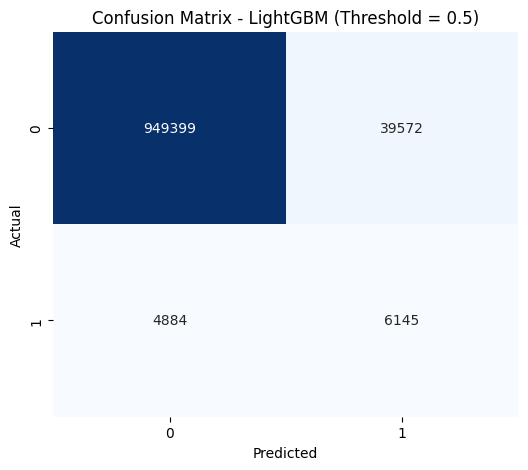


=== ROC-AUC SCORE (Threshold = 0.5) ===
0.9267350906098295


In [80]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]

for threshold in thresholds:
    y_pred_new = (y_prob >= threshold).astype(int)
    
    print(f"\n=== LIGHTGBM CLASSIFICATION REPORT (Threshold = {threshold}) ===")
    print(cr(y_test, y_pred_new))
    
    cmatrix = cm(y_test, y_pred_new)
    
    # Plot heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - LightGBM (Threshold = {threshold})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print(f"\n=== ROC-AUC SCORE (Threshold = {threshold}) ===")
    print(roc_auc_score(y_test, y_prob))



=== LIGHTGBM CLASSIFICATION REPORT (Threshold = 0.3) ===
              precision    recall  f1-score   support

           0       1.00      0.92      0.95    988971
           1       0.09      0.73      0.16     11029

    accuracy                           0.91   1000000
   macro avg       0.54      0.82      0.56   1000000
weighted avg       0.99      0.91      0.95   1000000



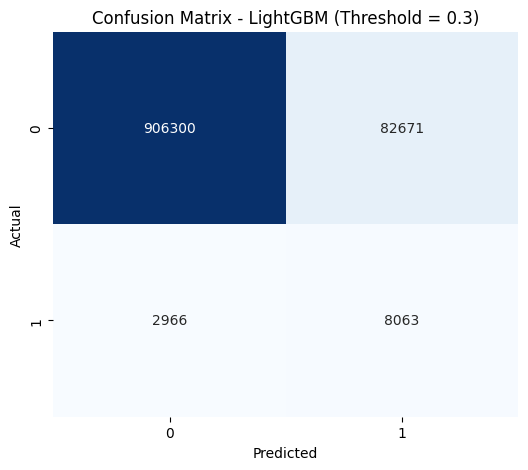


=== ROC-AUC SCORE ===
0.9267


In [81]:
# Set threshold
threshold = 0.3

# Generate predictions based on threshold
y_pred_final = (y_prob >= threshold).astype(int)

# Classification report
print(f"\n=== LIGHTGBM CLASSIFICATION REPORT (Threshold = {threshold}) ===")
print(cr(y_test, y_pred_final))

# Confusion matrix
cmatrix = cm(y_test, y_pred_final)

plt.figure(figsize=(6,5))
sns.heatmap(cmatrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix - LightGBM (Threshold = {threshold})")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC (still from probabilities)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\n=== ROC-AUC SCORE ===\n{roc_auc:.4f}")